In [1]:
import yfinance	as yf
import numpy as	np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.ensemble import IsolationForest
import plotly.graph_objects as go

In [16]:
 tickers = ['NVDA',	'AAPL',	'TSLA']
 start_date	= '2024-01-01'
 end_date = '2024-07-19'
 data =	{}
 for ticker	in	tickers:
     ticker_data = yf.Ticker(ticker)
     df	= ticker_data.history(start=start_date,	end=end_date)
     df['Ticker'] = ticker
     data[ticker] =	df

In [17]:
def	preprocess_data(data):
    processed_data	=	{}
    for	ticker,	df	in	data.items():
        df = df['Close'].resample('W').mean()
        processed_data[ticker]	=	df
    return	processed_data

processed_data = preprocess_data(data)

D:\Python\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
D:\Python\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


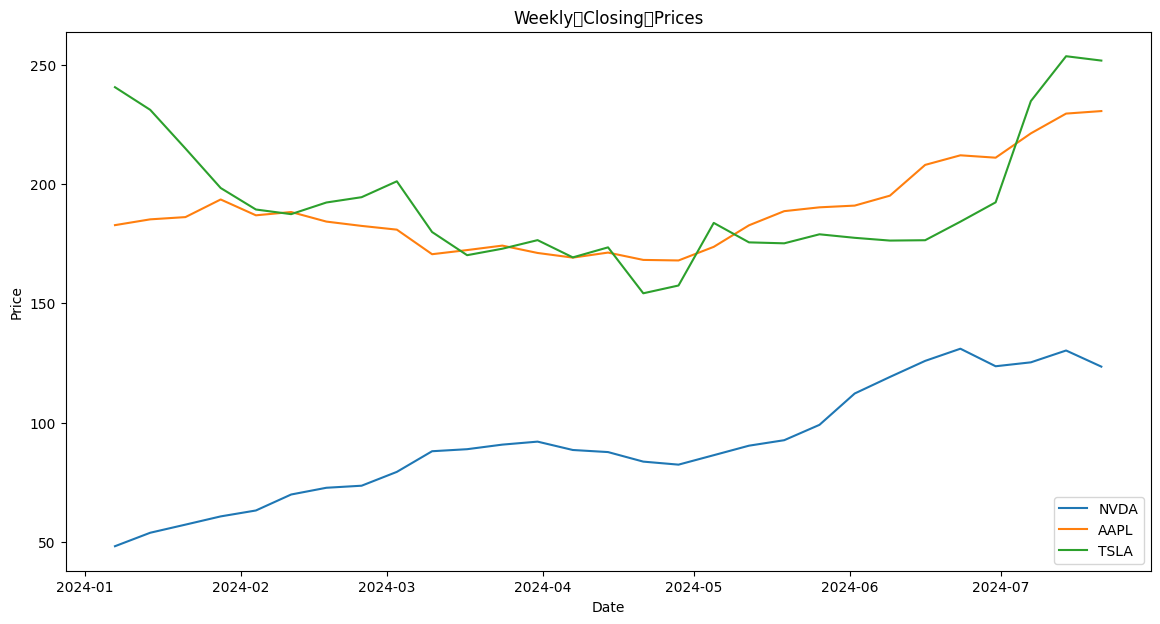

In [18]:
 def	plot_data(processed_data):
     plt.figure(figsize=(14,	7))
     for	ticker,	df	in	processed_data.items():
         plt.plot(df, label=ticker)
     plt.title('Weekly	Closing	Prices')
     plt.xlabel('Date')
     plt.ylabel('Price')
     plt.legend()
plot_data(processed_data) 

Anomalie détection : Isolation Forest

L'algorithme de la Forêt d'Isolation est conçu pour détecter les anomalies en créant des arbres d'isolation. Chaque instance de donnée est isolée par des partitions récursives, et les anomalies sont identifiées par leur apparition précoce dans l'arbre. 
L'algorithme peut être utilisé pour identifier des transactions inhabituelles qui pourraient indiquer une fraude, comme des montants de transactions anormalement élevés ou des transactions effectuées à des heures inhabituelles.En surveillant en temps réel les activités de trading, l'algorithme peut détecter des anomalies dans les volumes d'échange ou les prix, ce qui pourrait indiquer des manipulations de marché ou d'autres activités irrégulières. Dans notre cas de figure, on s'intérèsse a des schémas de prix anormaux qui pourraient indiquer la formation de bulles spéculatives. 

In [19]:
 class	AnomalyDetector:
 
        def	__init__(self,	contamination=0.05):
         self.contamination	=	contamination
         self.model	=	IsolationForest(contamination=self.contamination)
 
        def	fit(self,	data):
         self.data	=	pd.DataFrame(data)		#	Ensure	data	is	a	DataFrame
         self.model.fit(self.data.values.reshape(-1,	1))

        def	detect_anomalies(self):
         self.data['anomaly']	=	self.model.predict(self.data.values.reshape(-1,	1))
         self.data['anomaly']	=	self.data['anomaly'].apply(lambda	x:	1	if	x	==	-1	else	0)
         return	self.data
            
 detectors	=	{}
 for	ticker,	df	in	processed_data.items():
     detector	=	AnomalyDetector()
     detector.fit(df)
     detectors[ticker]	=	detector.detect_anomalies()

D:\Python\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


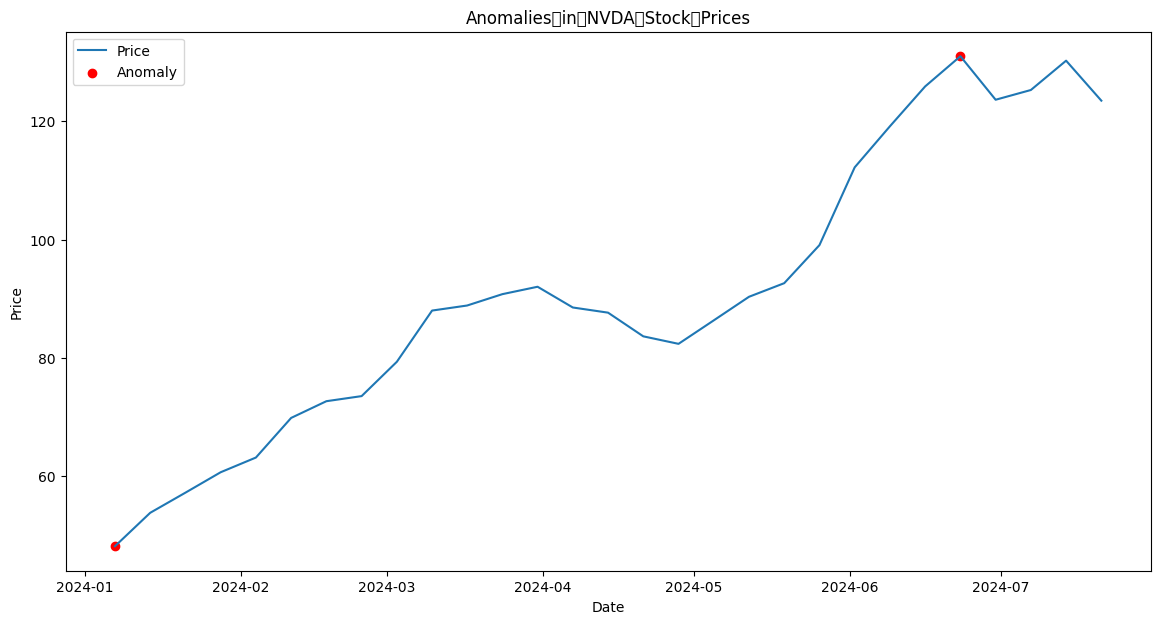

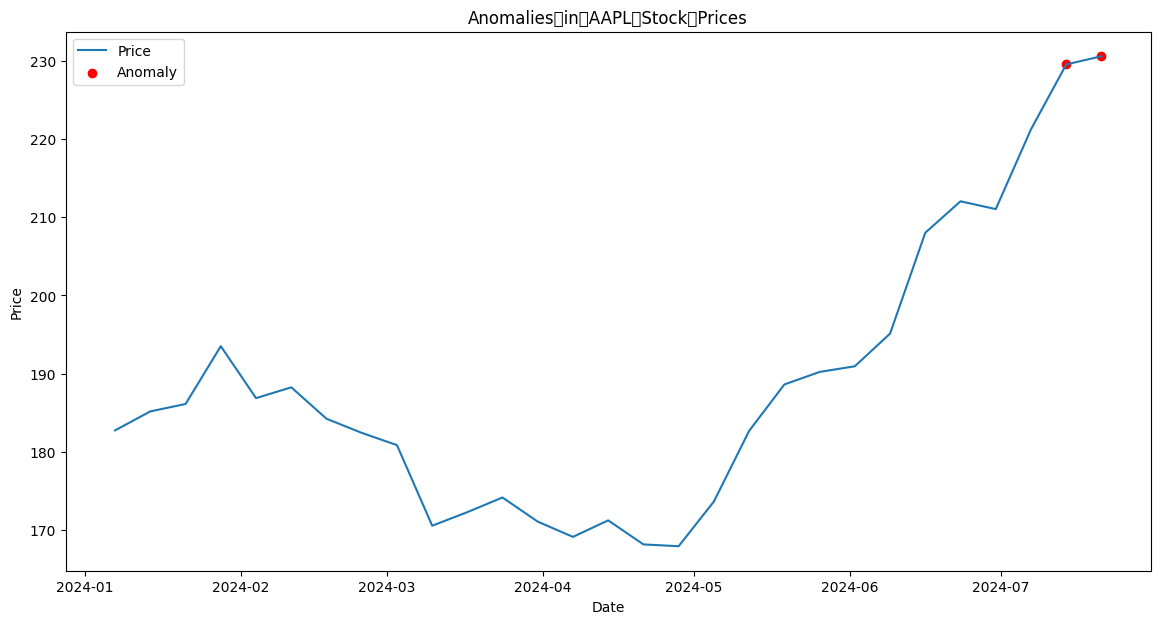

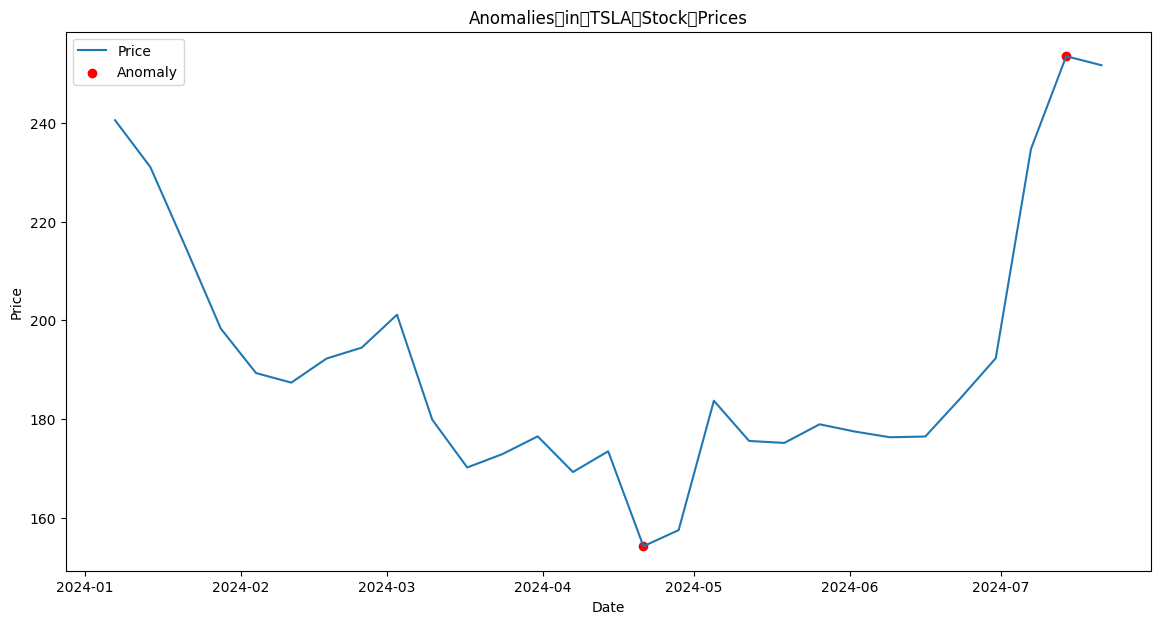

In [25]:
import	matplotlib.pyplot	as	plt
 
def	plot_anomalies(detectors):
     for	ticker,	df	in	detectors.items():
         plt.figure(figsize=(14,	7))
         plt.plot(df.index,	df.iloc[:,	0],	label='Price')
         anomalies	=	df[df['anomaly']	==	1]
         plt.scatter(anomalies.index,	anomalies.iloc[:,	0],	color='red',	label='Anomaly')
         plt.title(f'Anomalies	in	{ticker}	Stock	Prices')
         plt.xlabel('Date')
         plt.ylabel('Price')
         plt.legend()
         plt.show()
        
plot_anomalies(detectors)